Computer with size 90%

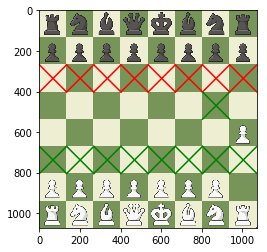

In [10]:
playing_as_white = True

import pickle
from matplotlib import pyplot as plt
import sys; import webbrowser; from pandas import read_csv
import pyperclip as clip
import pyautogui, time; pyautogui.size(); pyautogui.FAILSAFE = True; pyautogui.PAUSE = 0
import os
from time import sleep
from os import listdir
from os.path import isfile, join
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.preprocessing import StandardScaler

def save_obj(obj, name ):
    with open('../models/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('../models/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
model = load_obj("computer_model")
scaler = load_obj("computer_scaler")

# Delete screenshots
mypath = "/Users/petermyers/Desktop/"
files_to_delete = [f for f in listdir(mypath) if isfile(join(mypath, f)) and "Screen Shot" in f]
for file in files_to_delete:
    os.remove(mypath + file)

# Take Screenshot
sleep(0.1)
pyautogui.hotkey('command', 'shift', '3')

# Read Screenshot
sleep(0.9)
mypath = "/Users/petermyers/Desktop/"
screenshot_file = mypath + [f for f in listdir(mypath) if isfile(join(mypath, f)) and "Screen Shot" in f][0]
data = plt.imread(screenshot_file)

# Iterate
i = 0
j = 0
board = np.zeros([8,8])
X = []
for i in range(8):
    for j in range(8):
        cord_x = 478 + 134*i
        cord_y = 140 + 134*j
        X.append(data[cord_x:cord_x+134,cord_y:cord_y+132,:].flatten())
        # For QA
#         plt.imshow(data[cord_x:cord_x+134,cord_y:cord_y+132,:])
#         plt.savefig('../data/interim/{}_{}.png'.format(i,j))

X = pd.DataFrame(X).values
rescaledX = scaler.transform(X)
prediction = model.predict(rescaledX)
prediction

# Intialize
white_pawns = np.zeros([8,8])
white_pawns

black_pawns = np.zeros([8,8])
black_pawns

# Fill in white/black pawns
record = 0
for i in range(8):
    for j in range(8):
        if prediction[record,:][0] >= 0.5:
            white_pawns[i, j] = 1
        if prediction[record,:][1] >= 0.5:
            black_pawns[i, j] = 1
        record+=1

        
# Direction of pawn attacks        
if playing_as_white:
    direction = 1
else:
    direction = -1

# Black xs
black_xs = np.zeros([8,8])
record = 0
for i in range(8):
    for j in range(8):
        if black_pawns[i, j] == 1:
            try:
                black_xs[i+direction, j-1] = 1
            except:
                pass
            try:
                black_xs[i+direction, j+1] = 1
            except:
                pass 
            
# White xs
direction *= -1
white_xs = np.zeros([8,8])
record = 0
for i in range(8):
    for j in range(8):
        if white_pawns[i, j] == 1:
            try:
                white_xs[i+direction, j-1] = 1
            except:
                pass
            try:
                white_xs[i+direction, j+1] = 1
            except:
                pass 
        
# Make the image        
cord_x = 478 + 134*8
cord_y = 140 + 134*8
new_data = data[478:cord_x,140:cord_y,:]
fig, ax = plt.subplots(ncols=1)
for i in range(8):
    for j in range(8):
        if black_xs[i, j] == 1:
            cord_x1 = 0+134*j
            cord_x2 = 134+134*j
            cord_y1 = 0+134*i
            cord_y2 = 134+134*i
            ax.plot([cord_x1,cord_x2],[cord_y1,cord_y2], color="r")
            ax.plot([cord_x2,cord_x1],[cord_y1,cord_y2], color="r")
for i in range(8):
    for j in range(8):
        if white_xs[i, j] == 1:
            cord_x1 = 0+134*j
            cord_x2 = 134+134*j
            cord_y1 = 0+134*i
            cord_y2 = 134+134*i
            ax.plot([cord_x1,cord_x2],[cord_y1,cord_y2], color="g")
            ax.plot([cord_x2,cord_x1],[cord_y1,cord_y2], color="g")

ax.imshow(new_data)
plt.savefig('/Users/petermyers/Desktop/output.png')        
        